## Importing libraries


In [2]:
import tensorflow as tf # type: ignore
import matplotlib.pyplot as plt # type: ignore
import pandas as pd # type: ignore
import seaborn as sns # type: ignore


## Data processing 


In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 78153 files belonging to 38 classes.


Validation Image Preprocessing


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

 ## Building Model

In [14]:
from tensorflow.keras.layers import Dense,Conv2D,Flatten # type: ignore
from tensorflow.keras.models import Sequential # type: ignore

In [3]:
model = tf.keras.models.Sequential()

## Building Convolution layers 

In [6]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(tf.keras.layers.Flatten())

In [15]:
model.add(tf.keras.layers.Dropout(0.25)) # to avoid overfitting

In [17]:
model.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [19]:
#output layer
model.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [20]:
model.add(tf.keras.layers.Dropout(0.4))

## Compiling and Training Phase

In [21]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

## Model traning

In [31]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=4)


Epoch 1/4
2443/2443 [==============================] - 10342s 4s/step - loss: 8.3175 - accuracy: 0.0483 - val_loss: 3.6850 - val_accuracy: 0.0269
Epoch 2/4
2443/2443 [==============================] - 6924s 3s/step - loss: 8.2760 - accuracy: 0.0487 - val_loss: 3.6848 - val_accuracy: 0.0269
Epoch 3/4
2443/2443 [==============================] - 7323s 3s/step - loss: 8.3202 - accuracy: 0.0473 - val_loss: 3.6814 - val_accuracy: 0.0250
Epoch 4/4
2443/2443 [==============================] - 9995s 4s/step - loss: 8.2433 - accuracy: 0.0481 - val_loss: 3.6836 - val_accuracy: 0.0286


## Saving the model


In [24]:
model.save('trained_plant_disease_model.keras')

In [33]:
training_history.history #Return Dictionary of history

{'loss': [8.317512512207031,
  8.275975227355957,
  8.320226669311523,
  8.243284225463867],
 'accuracy': [0.04826430231332779,
  0.04866096004843712,
  0.04725346341729164,
  0.048149142414331436],
 'val_loss': [3.6850028038024902,
  3.6847970485687256,
  3.6814486980438232,
  3.683563470840454],
 'val_accuracy': [0.02686091512441635,
  0.02686091512441635,
  0.025039836764335632,
  0.028568176552653313]}

In [34]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [36]:
class_name = validation_set.class_names

In [37]:
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [4]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 17572 files belonging to 38 classes.


In [39]:
y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 521s 30ms/step


In [40]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [41]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [42]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([3, 3, 3, ..., 3, 3, 3], dtype=int64)>

In [43]:
from sklearn.metrics import confusion_matrix,classification_report # type: ignore
cm = confusion_matrix(Y_true,predicted_categories)

In [44]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.00      0.00      0.00       504
                                 Apple___Black_rot       0.00      0.00      0.00       497
                          Apple___Cedar_apple_rust       0.00      0.00      0.00       440
                                   Apple___healthy       0.03      1.00      0.06       502
                               Blueberry___healthy       0.00      0.00      0.00       454
          Cherry_(including_sour)___Powdery_mildew       0.00      0.00      0.00       421
                 Cherry_(including_sour)___healthy       0.00      0.00      0.00       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.00      0.00      0.00       410
                       Corn_(maize)___Common_rust_       0.00      0.00      0.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.00      0.00      0.

C:\Users\NAMAN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NAMAN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NAMAN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Confusion Matrix Visualization

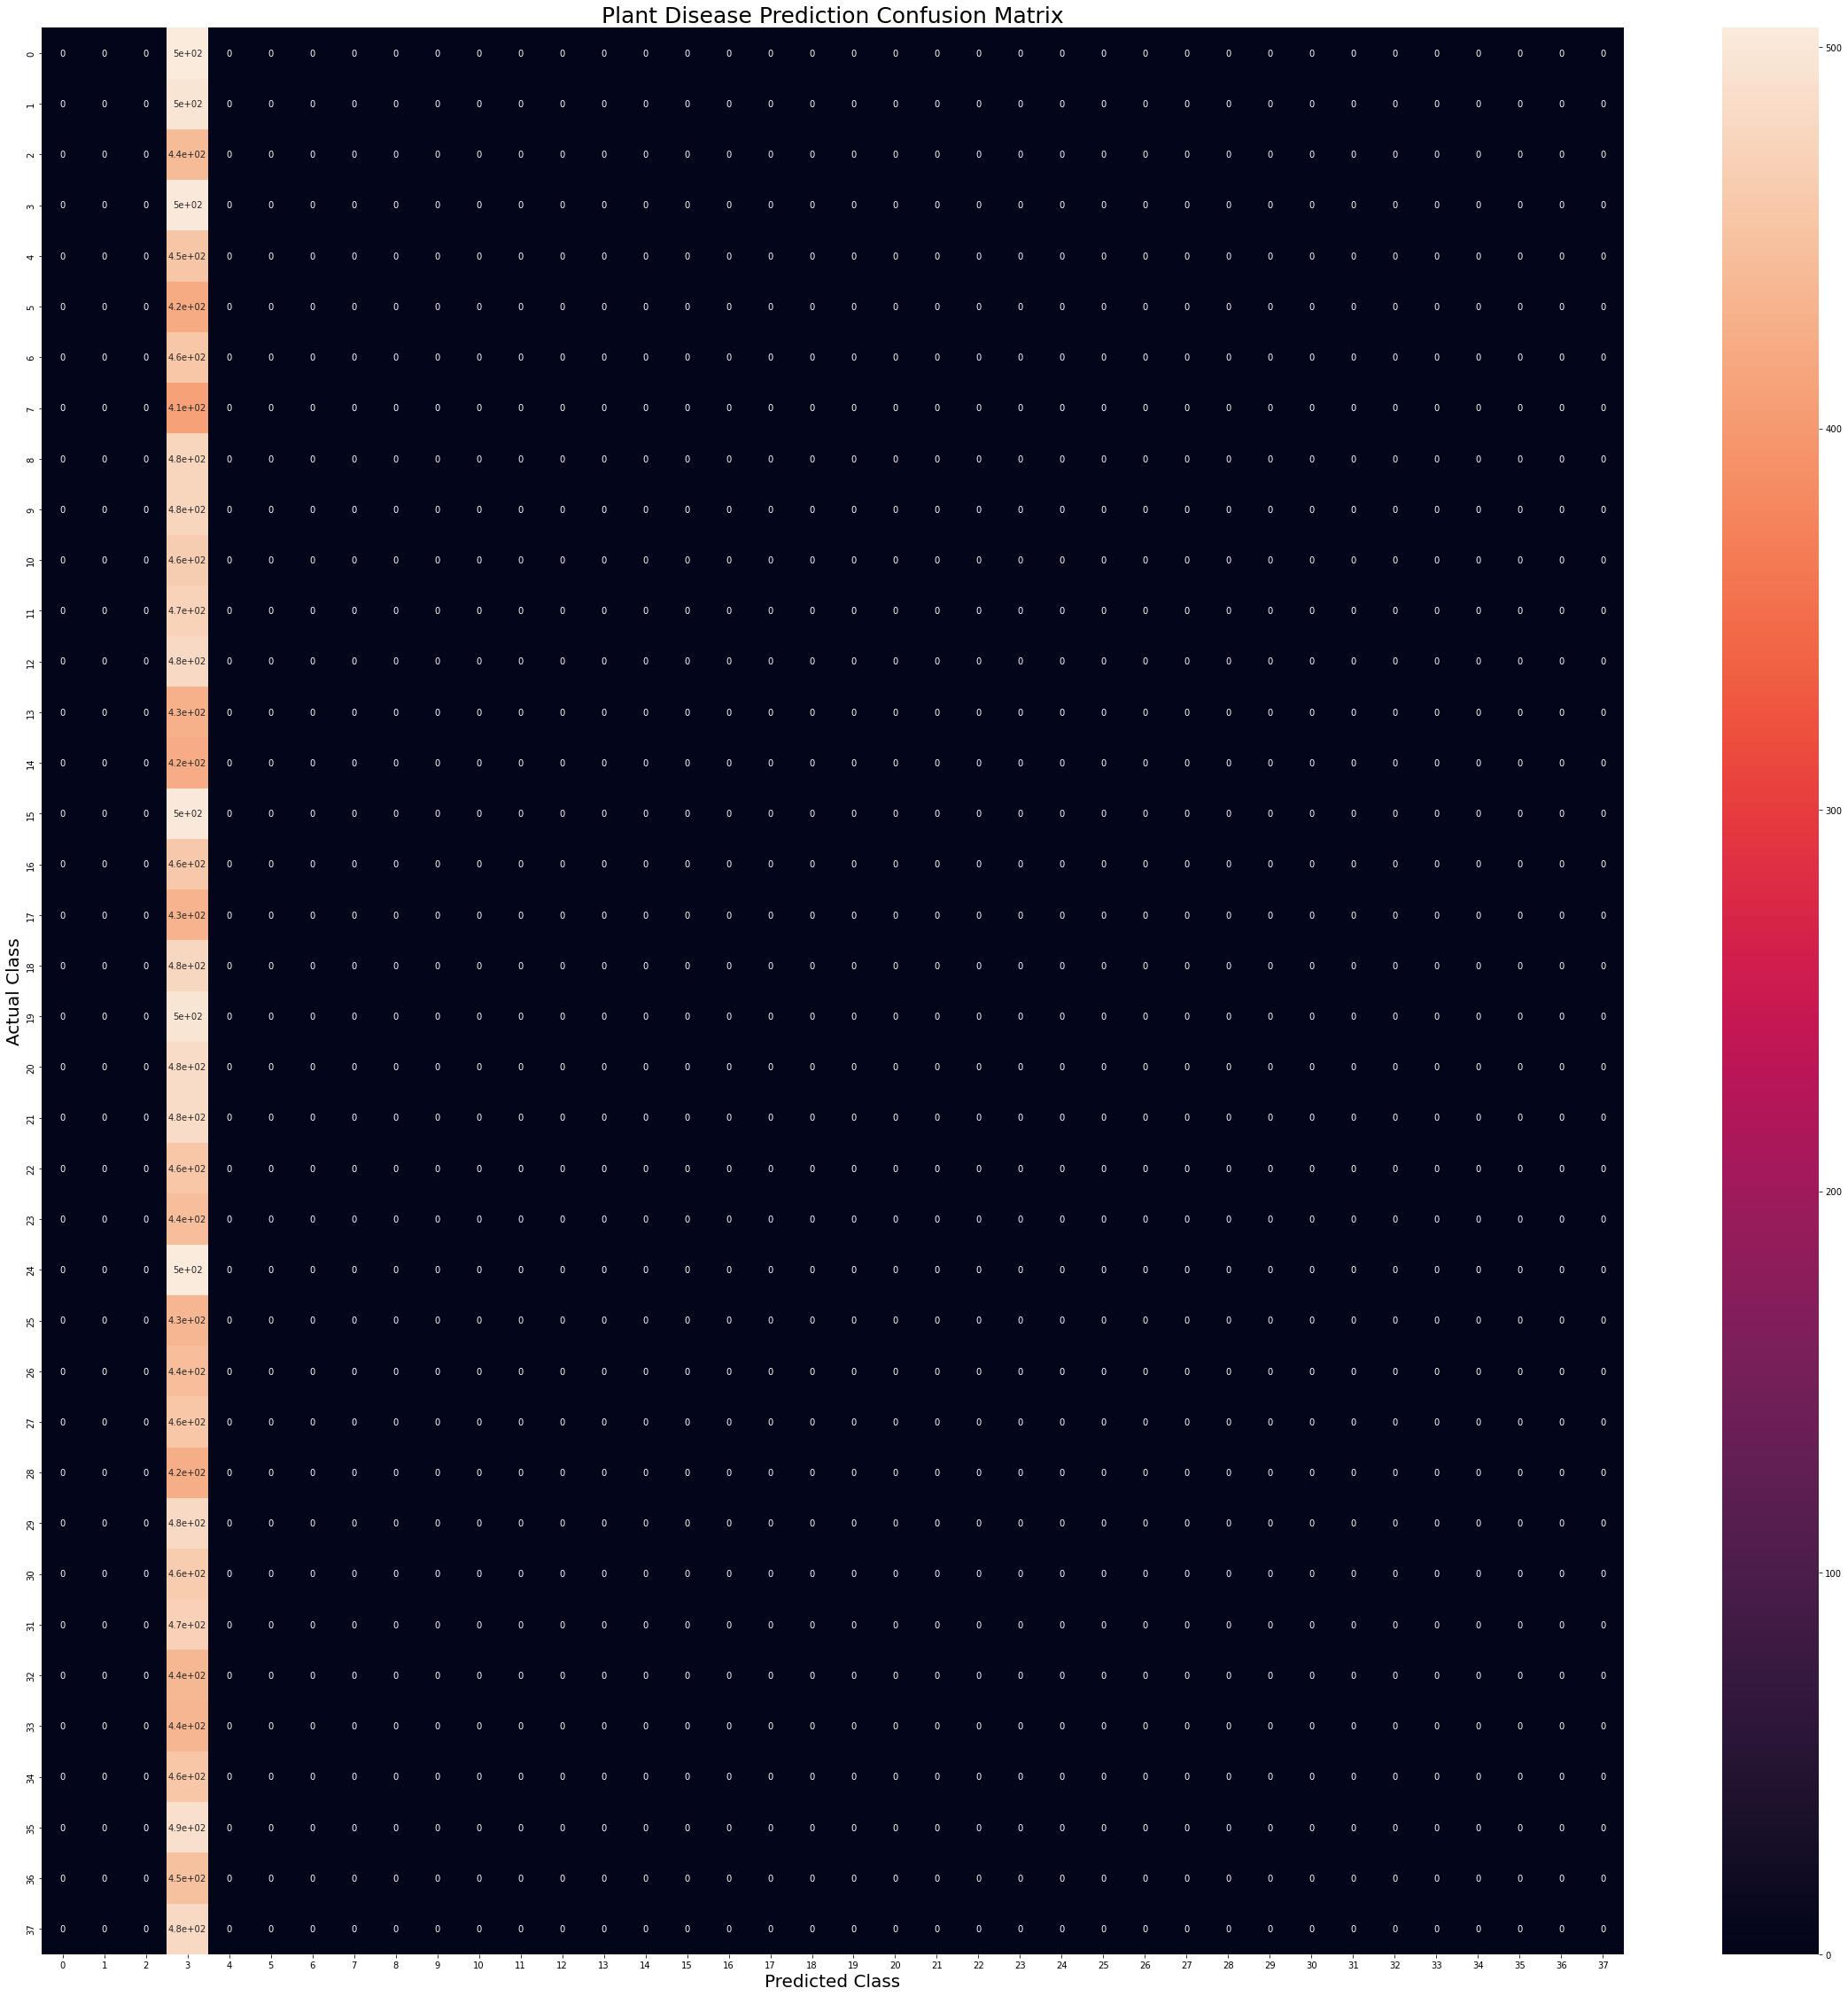

In [45]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()